<a href="https://colab.research.google.com/github/williamberrios/TallerUPCH/blob/master/Preprocesamiento%20de%20Datos/Taller_Preprocesamiento_de_Datos_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Explorando los datos de pacientes UCI con posible diagnóstico de Diabetes**
<p style='text-align: justify;'>Obtener una comprensión rápida del contexto de la salud general de un paciente ha sido particularmente importante durante la pandemia de COVID-19.Las Unidades de Cuidados Intensivos (UCI) a menudo carecen de historiales médicos verificados para los pacientes que ingresan. 

Es posible que un paciente angustiado, confundido o que no responda no pueda brindar información sobre afecciones crónicas. 

Además los registros médicos pueden tardar días en transferirse, especialmente para un paciente de otro proveedor o sistema médico.

Es por ello que conocimiento sobre enfermedades crónicas como la **diabetes** puede informar las decisiones clínicas sobre la atención del paciente y, en última instancia, mejorar los resultados del paciente.</p>




## 1. Herramienta

Para realizar el procesamiento de datos en python utilzaremos la libreria **Pandas**. Esta libreria permite preprocesar, transformar y generar variables a partir de un archivo **csv, parquet**, etc.

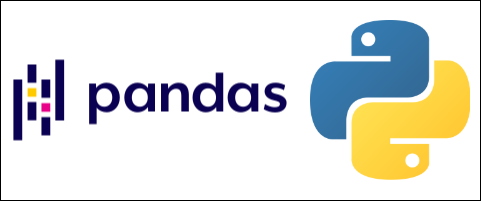

### Nociones Básicas
+ **DataFrame**:
    + Es la estructura de datos fundamental de Pandas, representa una tabla de datos panel con indexación integrada. 
    + Cada columna contiene los valores de una variable y cada fila un conjunto de valores de cada columna.
    + Input para modelos de machine learning (e.g xgboost, lightgbm, linear regression, etc) 

+ **Tipos de Datos**:
    + Object (string)
    + Float
    + Int
    + Category

+ **Operaciones principales**:
    + Groupby
    + Head, tail
    + Indexing (loc, iloc)
    + Sort


## 2. Descargando el Dataset

El dataset fue extraido de la competencia [Wids2021](https://www.kaggle.com/c/widsdatathon2021/data) organizado por Kaggle y Standford.

Descarga del archivo csv utilizando el comando **wget**

In [1]:
URL = 'https://raw.githubusercontent.com/williamberrios/TallerUPCH/master/Preprocesamiento%20de%20Datos/Data/WidsDataset.csv'
!wget $URL

--2022-02-09 02:40:57--  https://raw.githubusercontent.com/williamberrios/TallerUPCH/master/Preprocesamiento%20de%20Datos/Data/WidsDataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87263842 (83M) [text/plain]
Saving to: ‘WidsDataset.csv’

WidsDataset.csv     100%[===================>]  83.22M   167MB/s    in 0.5s    

2022-02-09 02:40:59 (167 MB/s) - ‘WidsDataset.csv’ saved [87263842/87263842]



## 3. Carga de Datos


+  Importamos la libreria pandas con la cual se trabajará el taller

In [2]:
# Importar Libreria
import pandas as pd

+ Realizamos la carga del dataset que se puede encontrar en archivo csv, xlsx, parquet entre otros


```
    # Lectura de CSV:
    data = pd.read_csv("file_route.csv")

    # Lectura de xlsx:
    data = pd.read_excel("file_route.xlsx")

    # Lectura de parquet:
    data = pd.read_parquet("file_route.parquet")

```



+ Para el taller trabajaremos con algunas variables 

In [3]:
# Leer archivo csv 
data = pd.read_csv("WidsDataset.csv")
target = ['diabetes_mellitus']
variables = ['age','weight','bmi','ethnicity','gender','height','d1_glucose_max','d1_glucose_min']
data = data[variables + target]

## 4. Análisis del Dataset

+ En esta seccion revisaremos los comandos:
    + .head()
    + .tail()
    + .info()
    + .describe()
    + .value_counts()
    + .nunique(), .unique()

+ Inspeccionamos aspectos generales del dataset

In [4]:
# Visualización del dataset
data.head()

,age,weight,bmi,ethnicity,gender,height,d1_glucose_max,d1_glucose_min,diabetes_mellitus
0,68.0,73.9,22.732803,Caucasian,M,180.3,168.0,109.0,1
1,77.0,70.2,27.421875,Caucasian,F,160.0,145.0,128.0,1
2,25.0,95.3,31.952749,Caucasian,F,172.7,NaN,NaN,0
3,81.0,61.7,22.635548,Caucasian,F,165.1,185.0,88.0,0
4,19.0,NaN,NaN,Caucasian,M,188.0,NaN,NaN,0


In [5]:
# Visualización del dataset
data.tail()

,age,weight,bmi,ethnicity,gender,height,d1_glucose_max,d1_glucose_min,diabetes_mellitus
130152,50.0,90.0,29.287256,Caucasian,M,175.3,NaN,NaN,0
130153,79.0,78.4,29.653433,Caucasian,F,162.6,139.0,139.0,0
130154,73.0,102.0,32.265371,African American,M,177.8,346.0,55.0,1
130155,81.0,83.9,24.408579,Caucasian,M,185.4,156.0,137.0,0
130156,35.0,100.8,30.132358,African American,M,182.9,100.0,100.0,0


In [ ]:
# Algunas caracteristicas de las variables del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130157 entries, 0 to 130156
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    125169 non-null  float64
 1   weight                 126694 non-null  float64
 2   bmi                    125667 non-null  float64
 3   ethnicity              128570 non-null  object 
 4   gender                 130091 non-null  object 
 5   height                 128080 non-null  float64
 6   hospital_admit_source  96959 non-null   object 
 7   icu_admit_source       129917 non-null  object 
 8   d1_glucose_max         121914 non-null  float64
 9   d1_glucose_min         121914 non-null  float64
 10  diabetes_mellitus      130157 non-null  int64  
dtypes: float64(6), int64(1), object(4)
memory usage: 10.9+ MB


In [ ]:
# ¿Cuales son los tipos de datos de las variables?
data.dtypes

age                  float64
weight               float64
bmi                  float64
ethnicity             object
gender                object
height               float64
d1_glucose_max       float64
d1_glucose_min       float64
diabetes_mellitus      int64
dtype: object

In [ ]:
# Calculando algunas estadísticas de laas variables numéricas
data.describe()

,age,weight,bmi,height,d1_glucose_max,d1_glucose_min,diabetes_mellitus
count,125169.000000,126694.000000,125667.000000,128080.000000,121914.000000,121914.000000,130157.000000
mean,61.995103,83.791104,29.110260,169.607219,174.149802,114.440310,0.216285
std,16.822880,24.963063,8.262776,10.833085,86.545466,38.217682,0.411712
min,0.000000,38.600000,14.844926,137.200000,73.000000,33.000000,0.000000
25%,52.000000,66.500000,23.598006,162.500000,117.000000,91.000000,0.000000
50%,64.000000,80.000000,27.564749,170.100000,150.000000,108.000000,0.000000
75%,75.000000,96.800000,32.803127,177.800000,200.000000,131.000000,0.000000
max,89.000000,186.000000,67.814990,195.590000,611.000000,288.000000,1.000000


+ Inspeccionando los valores que pertenences a las columnas del dataframe

In [ ]:
# Seleccionar los valores unicos de la variable ethnicity
unique_ethnicity = data['ethnicity'].unique()
print("Los valores únicos de la variable ethnicity:\n",unique_ethnicity)

Los valores únicos de la variable ethnicity:
 ['Caucasian' nan 'Hispanic' 'African American' 'Asian' 'Native American'
 'Other/Unknown']


In [ ]:
# Observar la distribucion de la variable ethnicity
data['ethnicity'].value_counts()

Caucasian           100236
African American     13911
Other/Unknown         6261
Hispanic              5049
Asian                 2198
Native American        915
Name: ethnicity, dtype: int64

In [ ]:
# Observar la distribucion de la variable ethnicity sin omitir los NaN
data['ethnicity'].value_counts(dropna = False)

Caucasian           100236
African American     13911
Other/Unknown         6261
Hispanic              5049
Asian                 2198
NaN                   1587
Native American        915
Name: ethnicity, dtype: int64

In [ ]:
# Observar la distribucion (%) de la variable ethnicity sin omitir los NaN
100*data['ethnicity'].value_counts(normalize = True,dropna = False)

Caucasian           77.011609
African American    10.687862
Other/Unknown        4.810344
Hispanic             3.879161
Asian                1.688730
NaN                  1.219297
Native American      0.702997
Name: ethnicity, dtype: float64

+ Valores Nulos

In [ ]:
# Calcular la cantidad de valores nulos en cada variable
data.isna().sum()

age                  4988
weight               3463
bmi                  4490
ethnicity            1587
gender                 66
height               2077
d1_glucose_max       8243
d1_glucose_min       8243
diabetes_mellitus       0
dtype: int64

In [ ]:
# Calcular el porcentaje de valores nulos en cada variable
100*data.isna().sum()/data.shape[0]

age                  3.832295
weight               2.660633
bmi                  3.449680
ethnicity            1.219297
gender               0.050708
height               1.595765
d1_glucose_max       6.333121
d1_glucose_min       6.333121
diabetes_mellitus    0.000000
dtype: float64

In [ ]:
pd.DataFrame(100*data.isna().sum()/data.shape[0]).reset_index().rename(columns = {'index':'Variable',0:'Porcentaje NA'})

,Variable,Porcentaje NA
0,age,3.832295
1,weight,2.660633
2,bmi,3.449680
3,ethnicity,1.219297
4,gender,0.050708
5,height,1.595765
6,d1_glucose_max,6.333121
7,d1_glucose_min,6.333121
8,diabetes_mellitus,0.000000


In [ ]:
data2 = data.copy()
data2['ethnicity'].fillna('NULO',inplace = True)

In [ ]:
pd.DataFrame(100*data2.isna().sum()/data2.shape[0]).reset_index().rename(columns = {'index':'Variable',0:'Porcentaje NA'})

,Variable,Porcentaje NA
0,age,3.832295
1,weight,2.660633
2,bmi,3.449680
3,ethnicity,0.000000
4,gender,0.050708
5,height,1.595765
6,d1_glucose_max,6.333121
7,d1_glucose_min,6.333121
8,diabetes_mellitus,0.000000


+ Seleccionar las variables del tipo Númerico y String

In [ ]:
data_numeric = data.select_dtypes(['int','float'])
data_numeric.head()

,age,weight,bmi,height,d1_glucose_max,d1_glucose_min,diabetes_mellitus
0,68.0,73.9,22.732803,180.3,168.0,109.0,1
1,77.0,70.2,27.421875,160.0,145.0,128.0,1
2,25.0,95.3,31.952749,172.7,NaN,NaN,0
3,81.0,61.7,22.635548,165.1,185.0,88.0,0
4,19.0,NaN,NaN,188.0,NaN,NaN,0


In [ ]:
data_not_numeric  = data.select_dtypes(['object'])
data_not_numeric.head()

,ethnicity,gender
0,Caucasian,M
1,Caucasian,F
2,Caucasian,F
3,Caucasian,F
4,Caucasian,M


## 5. Indexing & Filtering
En esta sección revisamos el indexado de dataframes y filtrado de los mismos con respecto a algunas condiciones. Se revisarán los siguientes comandos:
+ .loc
+ .iloc

In [ ]:
# seleccionar los registros que se encuentran entre las filas 5 y 10
data.iloc[5:10]
#data.loc[5:10]

,age,weight,bmi,ethnicity,gender,height,d1_glucose_max,d1_glucose_min,diabetes_mellitus
5,67.0,100.0,27.555611,Caucasian,M,190.5,156.0,125.0,1
6,59.0,156.6,57.451002,Caucasian,F,165.1,197.0,129.0,1
7,70.0,NaN,NaN,Caucasian,M,165.0,129.0,129.0,0
8,45.0,NaN,NaN,Caucasian,M,170.2,365.0,288.0,0
9,50.0,79.0,25.707702,NaN,M,175.3,134.0,134.0,0


In [ ]:
# seleccionar los registros que se encuentran entre las filas 5 y 10 de la primera columna
data.iloc[5:10,0]

5    67.0
6    59.0
7    70.0
8    45.0
9    50.0
Name: age, dtype: float64

In [ ]:
# seleccionar los registros que se encuentran entre las filas 5 y 10 de la primera columna
data.loc[5:10,'age']

5     67.0
6     59.0
7     70.0
8     45.0
9     50.0
10    72.0
Name: age, dtype: float64

In [ ]:
# Seleccionar los registros en donde la variable ethnicity toma el valor de Caucasian
filter_dataset = data[data['ethnicity']=='Caucasian']
filter_dataset.head()

,age,weight,bmi,ethnicity,gender,height,d1_glucose_max,d1_glucose_min,diabetes_mellitus
0,68.0,73.9,22.732803,Caucasian,M,180.3,168.0,109.0,1
1,77.0,70.2,27.421875,Caucasian,F,160.0,145.0,128.0,1
2,25.0,95.3,31.952749,Caucasian,F,172.7,NaN,NaN,0
3,81.0,61.7,22.635548,Caucasian,F,165.1,185.0,88.0,0
4,19.0,NaN,NaN,Caucasian,M,188.0,NaN,NaN,0


In [ ]:
# Seleccionar los registros en donde la variable ethnicity toma el valor de Caucasian y Genero Femenino
filter_dataset = data[(data['ethnicity']=='Caucasian')&(data['gender']=='F')]
filter_dataset.head()

,age,weight,bmi,ethnicity,gender,height,d1_glucose_max,d1_glucose_min,diabetes_mellitus
1,77.0,70.2,27.421875,Caucasian,F,160.0,145.0,128.0,1
2,25.0,95.3,31.952749,Caucasian,F,172.7,NaN,NaN,0
3,81.0,61.7,22.635548,Caucasian,F,165.1,185.0,88.0,0
6,59.0,156.6,57.451002,Caucasian,F,165.1,197.0,129.0,1
11,80.0,70.1,27.382812,Caucasian,F,160.0,137.0,100.0,0


## 6. Aregaciones y estadísticas de algunas Variables
En esta sección veremos como generar algunas estadísticas y agregaciones de las variables del dataset.

In [ ]:
data.head()

,age,weight,bmi,ethnicity,gender,height,d1_glucose_max,d1_glucose_min,diabetes_mellitus
0,68.0,73.9,22.732803,Caucasian,M,180.3,168.0,109.0,1
1,77.0,70.2,27.421875,Caucasian,F,160.0,145.0,128.0,1
2,25.0,95.3,31.952749,Caucasian,F,172.7,NaN,NaN,0
3,81.0,61.7,22.635548,Caucasian,F,165.1,185.0,88.0,0
4,19.0,NaN,NaN,Caucasian,M,188.0,NaN,NaN,0


+ Estadisticas mas representativas:
    + max
    + mean
    + min
    + mode 

In [ ]:
# Media de las edades de los pacientes
mean_age = data['age'].mean()
print('Edad media de los pacientes es: ', round(mean_age,3))

Edad media de los pacientes es:  61.99510262125606
Edad media de los pacientes es:  61.995


In [ ]:
# Mediana de los pesos de los pacientes:
median_weight = data['weight'].median()
print('Mediana de los pesos de los pacientes es: ',data['weight'].median())

Mediana de los pesos de los pacientes es:  80.0


In [ ]:
# Minima y máxima altura de los pacientes:
min_altura,max_altura = data['height'].min(),data['height'].max()
print(f'La altura máxima es {max_altura} y la altura mínima es {min_altura}')

La altura máxima es 195.59 y la altura mínima es 137.2


In [ ]:
# Moda de la variable tipo de etnia
mode_etnia = data['ethnicity'].mode()[0]
print(f"Moda de la variable etnia de los pacientes es {mode_etnia}")

Moda de la variable etnia de los pacientes es Caucasian


+ **Group by**
    + Este método nos permite dividir eficiente el dataset en grupos basados en cierta condicion 

```
        # Python
        dataframe.groupby([variables_grupo])[variable_a_calcular_estadistica].mean() 
```



In [ ]:
# Calcular la edad promedio de los pacientes por cada tipo de etnia
data.groupby(['ethnicity'])['age'].mean()

ethnicity
African American    56.132033
Asian               61.630208
Caucasian           63.319848
Hispanic            59.791572
Native American     51.887541
Other/Unknown       58.038418
Name: age, dtype: float64

In [ ]:
data.groupby(['ethnicity'])['age'].mean().reset_index()

,ethnicity,age
0,African American,56.132033
1,Asian,61.630208
2,Caucasian,63.319848
3,Hispanic,59.791572
4,Native American,51.887541
5,Other/Unknown,58.038418


In [ ]:
data.groupby(['ethnicity'])['age'].mean().reset_index().rename(columns = {'age':'age_mean'})

,ethnicity,age_mean
0,African American,56.132033
1,Asian,61.630208
2,Caucasian,63.319848
3,Hispanic,59.791572
4,Native American,51.887541
5,Other/Unknown,58.038418


In [ ]:
# Que tipo de etnia poseen una mayor prevalencia a presentar diabetes melitus cuando son ingresados a uci
data.groupby(['ethnicity'])['diabetes_mellitus'].mean().reset_index()

,ethnicity,diabetes_mellitus
0,African American,0.262670
1,Asian,0.244768
2,Caucasian,0.205565
3,Hispanic,0.246187
4,Native American,0.321311
5,Other/Unknown,0.254752


In [ ]:
df_group_ethnicity = data.groupby(['ethnicity'])['diabetes_mellitus'].mean().reset_index()
df_group_ethnicity = df_group_ethnicity.sort_values(by = ['diabetes_mellitus'],ascending = False)
df_group_ethnicity

,ethnicity,diabetes_mellitus
4,Native American,0.321311
0,African American,0.262670
5,Other/Unknown,0.254752
3,Hispanic,0.246187
1,Asian,0.244768
2,Caucasian,0.205565


In [ ]:
# Cual es la mediana del peso de los pacientes por genero
data.groupby(['gender'])['weight'].median()

gender
F    72.5
M    85.7
Name: weight, dtype: float64

+ Calculo de Agregaciones mediante el método ".agg()"



```
    df.groupby([variables_grupo]).agg({'variable':[agregaciones]})
```



In [ ]:
# Calcular la mediana, media y máximo valor del peso por cada género
data.groupby(['gender']).agg({'weight':['median','mean','max']})

weight                  
       median       mean    max
gender                         
F        72.5  77.042256  186.0
M        85.7  89.487018  186.0

In [ ]:
data.groupby(['gender']).agg(age_median = ('age','median'),age_mean = ('age','mean')).reset_index()

,gender,age_median,age_mean
0,F,65.0,62.571487
1,M,63.0,61.547806


In [ ]:
# Calcular la media y la mediana de edades de los pacientes por tipo de etnia y genero
data.groupby(['ethnicity','gender']).agg({'age':['median','mean']})

age           
                        median       mean
ethnicity        gender                  
African American F        58.0  56.828763
                 M        57.0  55.492216
Asian            F        65.0  61.689690
                 M        64.0  61.576819
Caucasian        F        67.0  63.887713
                 M        65.0  62.856581
Hispanic         F        64.0  60.703432
                 M        60.0  59.034574
Native American  F        53.0  51.800000
                 M        53.0  51.971861
Other/Unknown    F        62.0  59.113984
                 M        59.0  57.287760

# 7.Ejercicios

###### 7.1 ¿Determinar que genero esta mas predispuesto a tener diabetes mellitus en base al dataset observado?


In [ ]:
# Pregunta 7.1
data['gender'].value_counts(normalize = True,dropna = False)

M      0.541792
F      0.457701
NaN    0.000507
Name: gender, dtype: float64

###### 7.2 ¿Cual es la edad promedio de los pacientes que pertenecen a la etnia Hispanic y tienen una altura mayor a 175 cm?

In [7]:
# Pregunta 7.2
filter = (data['ethnicity']=='Hispanic')&(data['height']>175)
data[filter]['age'].mean()

55.85370950888192

###### 7.3 ¿Cual es la cantidad de valores nulos en la variable 'd1_glucose_max' para cada tipo de etnia?


In [ ]:
# Pregunta 7.3
null_data = data[data['d1_glucose_max'].isna()]
null_data.groupby(['ethnicity'])['age'].count()

ethnicity
African American     833
Asian                151
Caucasian           6064
Hispanic             211
Native American       33
Other/Unknown        367
Name: age, dtype: int64

###### 7.4 Calcular la mediana y la desviacion estandar de la variable peso por cada etnia en pacientes mujeres que presentan dibetes mellitus


In [ ]:
# Pregunta 7.4
filter = (data['gender'] == 'F') & (data['diabetes_mellitus']==1)
data[filter].groupby(['ethnicity']).agg({'weight':['mean']})

,weight
,mean
ethnicity,
African American,89.554461
Asian,62.973636
Caucasian,86.365710
Hispanic,76.440455
Native American,87.128201
Other/Unknown,78.464845
